# The least-squares line

Here we use some basic algebra and calculus, to prove the equation for the best fit line between a vector of values $[ x_1, x_2, \dots, x_n ]$, and another vector of values $[ y_1, y_2, \dots, y_n ]$.

We define the line to have intercept $c$ and slope $b$.

The $y$ values *predicted* by the line are therefore $[ c + b x_1, c + b x_2, \dots, c + b x_n]$.

The errors are the observed values of $y$ minus the predicted values:

$$
[y_1 - (c + b x_1), y_2 - (c + b x_2), \dots, y_n - (c + b x_n)]
$$

We define the "best fit" line as the line that minimizes the sum of the squared errors.

We can write the sum of squared errors $SSE$ using [sum notation](http://matthew-brett.github.io/teaching/some_sums.html):

$$
SSE = \sum_{i=1}^n{(y_i - (c + b x_i))^2}
$$

We are therefore looking for the values of $c$ and $b$ that minimize $SSE$.

In [1]:
# Sympy is Python's symbolic mathematics library.
from sympy import (symbols, summation, diff, IndexedBase, Add, Eq,
                   simplify, expand, solve)
# Render Sympy equations nicely in the notebook
from sympy.interactive import printing
printing.init_printing()

In [2]:
# Symbols
i, n = symbols('i, n', integer=True, positive=True)
c, b = symbols('c, b')  # Intercept and slope
# The vectors of x and y observations
x = IndexedBase('x')
y = IndexedBase('y')

Equation for the predicted (fitted) value, for a given intercept $c$ and slope $b$:

In [3]:
predicted = c + b * x[i]
predicted

The error is the actual value $y_i$ minus the predicted value.

In [4]:
error = y[i] - predicted
error

The sum of the squared error is the sum of all the individal squared errors:

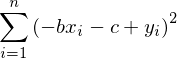

In [5]:
SSE = summation(error ** 2, (i, 1, n))
SSE

We use the [algebra of sums](http://matthew-brett.github.io/teaching/some_sums.html) to expand out this sums, to several sums:

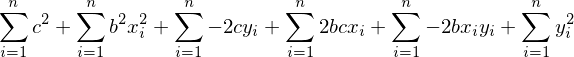

In [6]:
SSE = expand(SSE)
SSE

We force Sympy to apply more of the [algebra of sums](http://matthew-brett.github.io/teaching/some_sums.html) rules, like this:

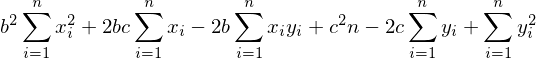

In [7]:
SSE = Add(*[simplify(term).doit() for term in SSE.args])
SSE

Let us imagine we have set up the values in $[x_1, x_2, \dots, x_n]$ so they have a mean of 0.

When the mean of the $x_i$ values is 0, then $\sum_{i=1}^n{x_i}$ must also be 0.

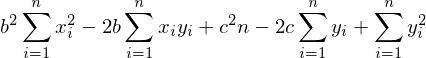

In [8]:
sum_x = summation(x[i], (i, 1, n))
when_x_0_mean = SSE.replace(sum_x, 0)
when_x_0_mean

Differentiate with respect to $c$, so we can look for the value of $c$ that minimizes this expression:

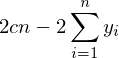

In [9]:
d_wrt_c = diff(when_x_0_mean, c)
d_wrt_c

Set to equal 0 and solve for $c$.

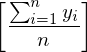

In [10]:
c_has_diff_0 = solve(Eq(0, d_wrt_c), c)
c_has_diff_0

Differentiate again to show that this second derivative is always positive, and therefore that the value above is a minimum (not a maximum):

In [11]:
dd_wrt_c = diff(d_wrt_c, c)
dd_wrt_c

We conclude that, regardless of the slope $b$ (that does not appear in the derivative), the value of $c$ that minimizes the sum of squared error is the mean of the $y_i$ values.

Now solve for the slope:

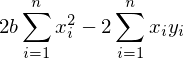

In [12]:
d_wrt_b = diff(when_x_0_mean, b)
d_wrt_b

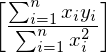

In [13]:
b_has_diff_0 = solve(Eq(0, d_wrt_b), b)
b_has_diff_0

The second derivative is always positive, so the value above must be a minimum: 

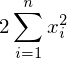

In [14]:
dd_wrt_b = diff(d_wrt_b, b)
dd_wrt_b

We find that the slope minimizing the sum of squared error, is the sum of all the $x_i, y_i$ pairs multiplied, divided by the sum of the squared $x_i$ values.  This is true regardless of the intercept $c$ (that does not appear in the derivative).